In [1]:
## Multiple Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')
df_index.head(5)

,SNo,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


<Axes: >

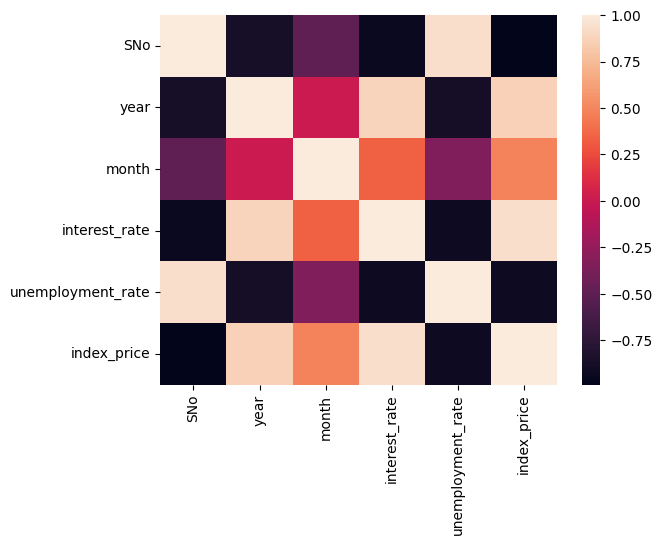

In [3]:
sns.heatmap(df_index.corr())

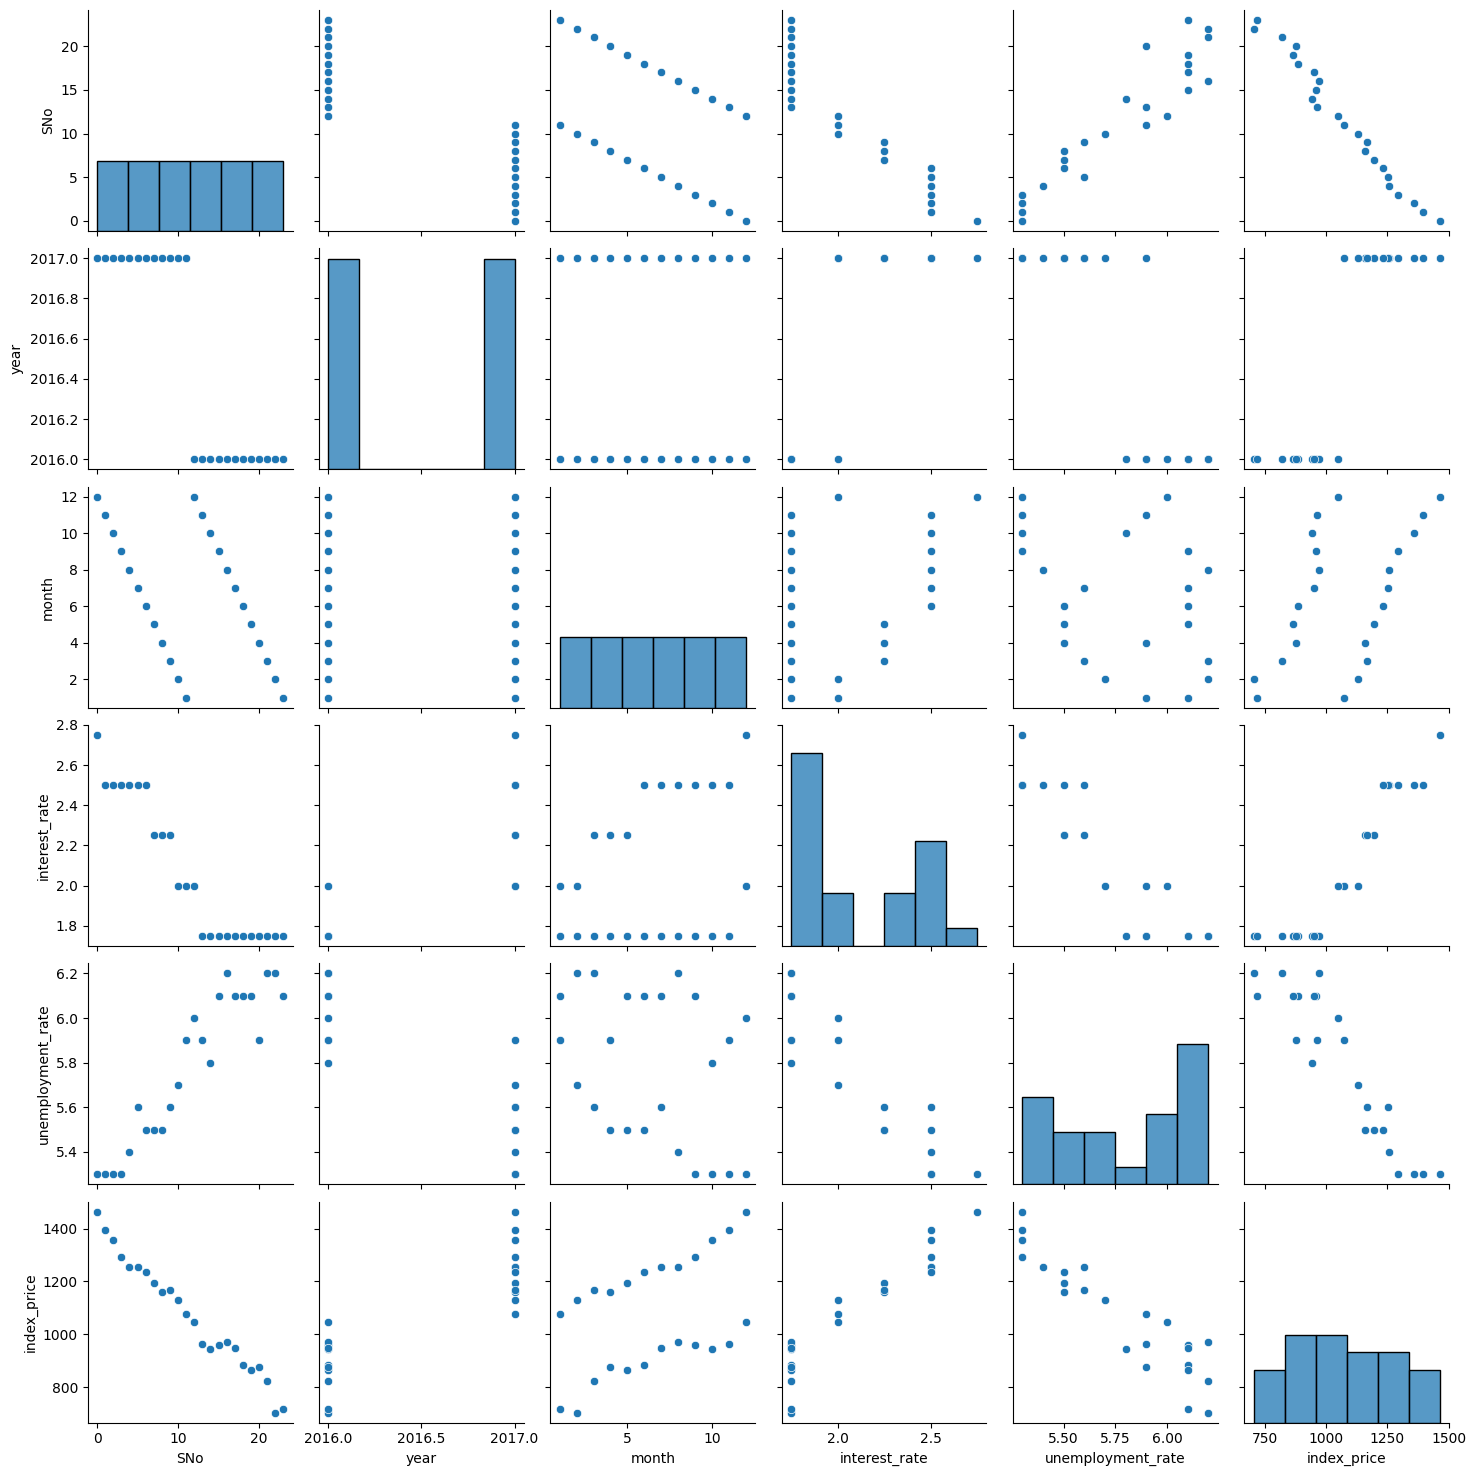

In [4]:
sns.pairplot(df_index)

In [5]:
df_index.isnull().sum()

SNo                  0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
df_index.describe()

,SNo,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [12]:
## drop unnecesssary col
df_index.drop(columns=['SNo','year','month'],axis=1)
df_index

KeyError: "['SNo', 'year', 'month'] not found in axis"

In [16]:
df_index.head(5)
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

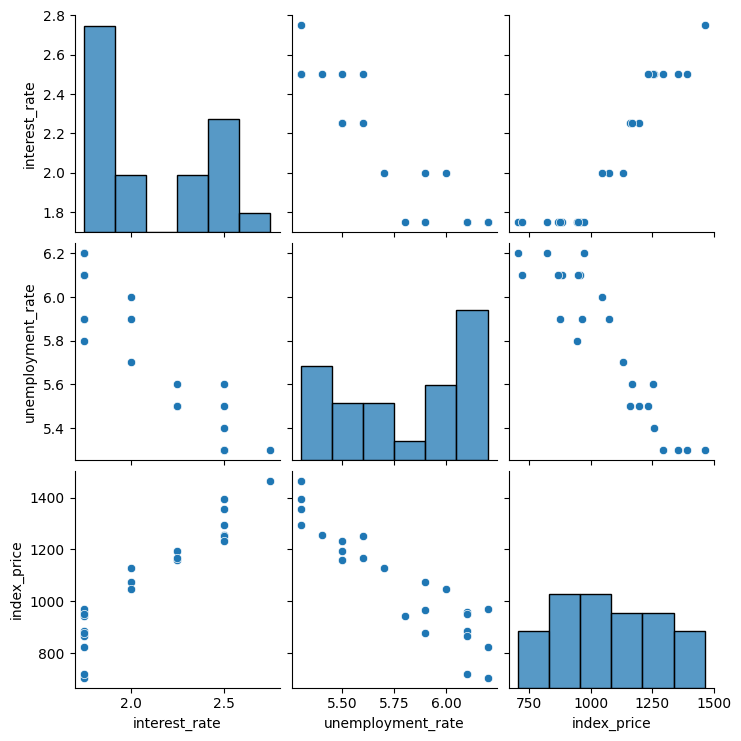

In [17]:
## lets do some visualization
sns.pairplot(df_index)

In [18]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

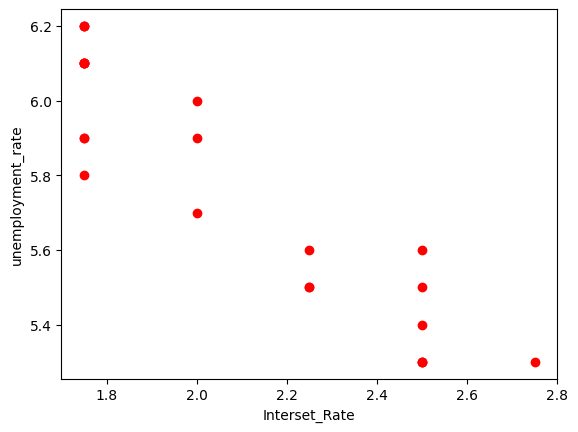

In [22]:
### visualize the datappoints more slosely

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Interset_Rate")
plt.ylabel("unemployment_rate")

In [26]:
## get my independent and dependent features

X=df_index[['interest_rate','unemployment_rate']]
y=df_index['index_price']
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [ ]:
## train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


    interest_rate  unemployment_rate
13           1.75                5.9
1            2.50                5.3
21           1.75                6.2
5            2.50                5.6
2            2.50                5.3
12           2.00                6.0
15           1.75                6.1
3            2.50                5.3
4            2.50                5.4
22           1.75                6.2
17           1.75                6.1
20           1.75                5.9
23           1.75                6.1
7            2.25                5.5
10           2.00                5.7
14           1.75                5.8
19           1.75                6.1
6            2.50                5.5


<Axes: xlabel='interest_rate', ylabel='index_price'>

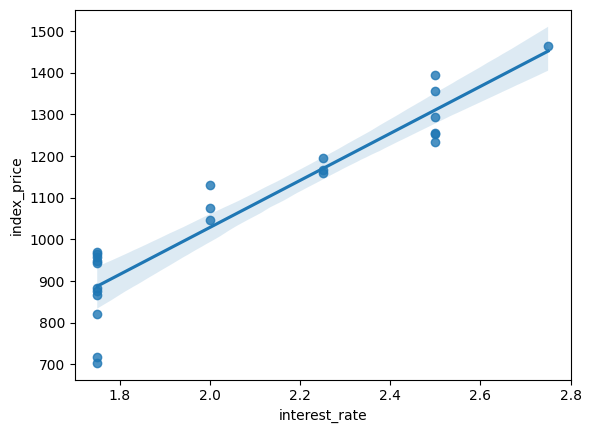

In [38]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

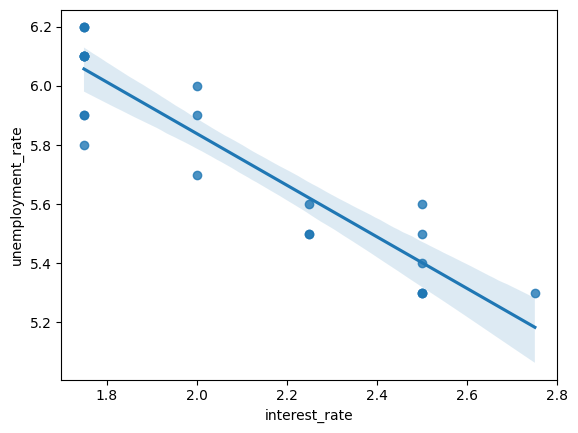

In [39]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])


<Axes: >

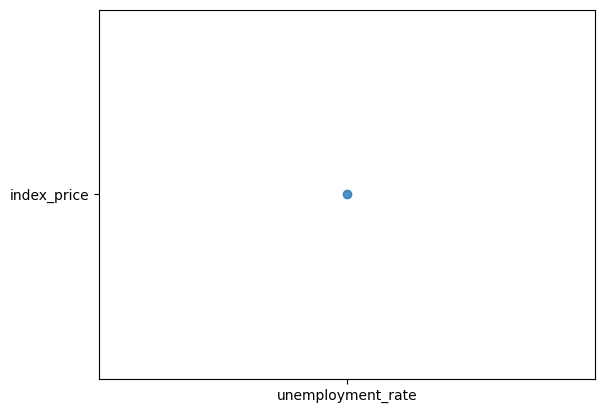

In [40]:
sns.regplot(x=['unemployment_rate'],y=['index_price'])

In [ ]:
## standered scale

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
print(scaler)
print(type(scaler))
scaler.fit_transform(X_train)


StandardScaler()
<class 'sklearn.preprocessing._data.StandardScaler'>


array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [ ]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()


In [47]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
print(validation_score)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [53]:
np.mean(validation_score)

np.float64(-5914.82818016241)

In [54]:
## predication
y_pred=regression.predict(X_test)

In [55]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)
rmse=np.sqrt(mse)
print(rmse)

5793.762887712554
59.935781523235505
76.11677139574796


In [57]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.827897809145715


In [59]:
#OLS
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [61]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Wed, 18 Jun 2025   Prob (F-statistic):                    7.46e-19
Time:                        20:21:40   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

d:\ML\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [7]:
df_index.head()

,SNo,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
df_index.corr

<bound method DataFrame.corr of     SNo  year  month  interest_rate  unemployment_rate  index_price
0     0  2017     12           2.75                5.3         1464
1     1  2017     11           2.50                5.3         1394
2     2  2017     10           2.50                5.3         1357
3     3  2017      9           2.50                5.3         1293
4     4  2017      8           2.50                5.4         1256
5     5  2017      7           2.50                5.6         1254
6     6  2017      6           2.50                5.5         1234
7     7  2017      5           2.25                5.5         1195
8     8  2017      4           2.25                5.5         1159
9     9  2017      3           2.25                5.6         1167
10   10  2017      2           2.00                5.7         1130
11   11  2017      1           2.00                5.9         1075
12   12  2016     12           2.00                6.0         1047
13   13  2016   

In [9]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SNo                24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


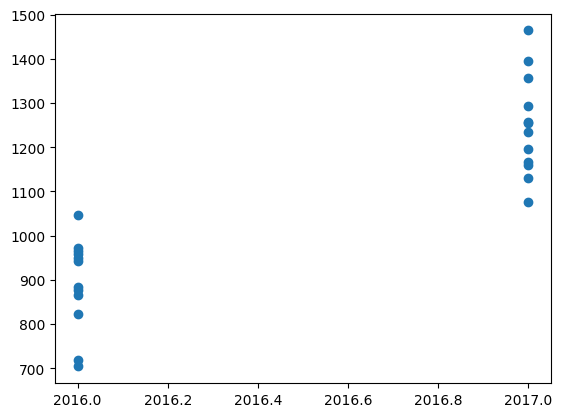

In [10]:
plt.scatter(df_index['year'],df_index['index_price'])